# Ken Jee YouTube Data Analysis
***July 28, 2025***

**About the dataset**

The dataset used in this analysis is the Ken Jee YouTube Data Analysis dataset, which contains information about YouTube videos, channels, and subscribers. [Here](https://www.kaggle.com/datasets/kenjee/ken-jee-youtube-data) is the dataset. It includes 4 csv files: 
- the video data 
- country and subscriber data
- comments data 
- the aggregated data

**Analysis targets:**
1. What are the themes of the comment data?
2. What types of video titles and thumbnails drive the most traffic?
3. Who is my core audience and what are they interested in?
4. What types of videos have lead to the most growth?
5. What type of content are people engaging with the most or watching the longest?
---
**Advanced targets:**
1. What are the most common words or phrases used in the video titles and thumbnails?
2. How does the video duration affect the number of views and subscribers?
3. What is the relationship between the video duration and the number of comments?

## Firstly, importing the libraries and loading the data

In [2]:
# Basic libraries
import pandas as pd
import numpy as np

# Ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ignore the plt.show() in each query
%matplotlib inline
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (22, 5)
plt.rcParams['figure.dpi'] = 100

# Showing the whole numbers with fixed decimals
pd.set_option('display.float_format', '{:,.2f}'.format)

# For Word Cloud picture
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# For Polarity analysis
from textblob import TextBlob

# For bert analysis
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# ignore the warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading datasets
data1 = pd.read_csv('inputs/Aggregated_Metrics_By_Country_And_Subscriber_Status.csv')
data2 = pd.read_csv('inputs/Aggregated_Metrics_By_Video.csv')
data3 = pd.read_csv('inputs/All_Comments_Final.csv')
data4 = pd.read_csv('inputs/Video_Performance_Over_Time.csv')

Country_df = data1.copy()
Video_df = data4.copy()
Comment_df = data3.copy()
Aggregate_df = data2.copy()

## Next, let's begin with the *EDA*.

### `Country_df` dataset

In [4]:
Country_df.head(3)

,Video Title,External Video ID,Video Length,Thumbnail link,Country Code,Is Subscribed,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
0,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,HK,True,23,1,0,0,2,0,0.67,39.64,0
1,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,ME,True,3,0,0,0,0,0,0.50,29.43,0
2,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,RW,True,2,0,0,0,0,0,0.68,40.23,0


In [5]:
Country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55292 entries, 0 to 55291
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Video Title                 55292 non-null  object 
 1   External Video ID           55292 non-null  object 
 2   Video Length                55292 non-null  int64  
 3   Thumbnail link              55292 non-null  object 
 4   Country Code                54906 non-null  object 
 5   Is Subscribed               55292 non-null  bool   
 6   Views                       55292 non-null  int64  
 7   Video Likes Added           55292 non-null  int64  
 8   Video Dislikes Added        55292 non-null  int64  
 9   Video Likes Removed         55292 non-null  int64  
 10  User Subscriptions Added    55292 non-null  int64  
 11  User Subscriptions Removed  55292 non-null  int64  
 12  Average View Percentage     53854 non-null  float64
 13  Average Watch Time          538

In [6]:
Country_df.describe()

,Video Length,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
count,"55,292.00","55,292.00","55,292.00","55,292.00","55,292.00","55,292.00","55,292.00","53,854.00","53,854.00","55,292.00"
mean,896.68,100.57,4.24,0.11,0.18,2.37,0.05,0.35,205.30,0.00
std,927.38,"1,704.97",65.29,2.51,3.60,65.89,0.77,0.26,206.54,0.00
min,47.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,375.00,2.00,0.00,0.00,0.00,0.00,0.00,0.15,85.44,0.00
50%,545.00,7.00,0.00,0.00,0.00,0.00,0.00,0.32,170.14,0.00
75%,934.00,27.00,1.00,0.00,0.00,0.00,0.00,0.49,259.45,0.00
max,"5,029.00","285,593.00","9,165.00",399.00,436.00,"9,599.00",103.00,4.97,"5,027.66",0.00


In [7]:
Country_df.columns

Index(['Video Title', 'External Video ID', 'Video Length', 'Thumbnail link',
       'Country Code', 'Is Subscribed', 'Views', 'Video Likes Added',
       'Video Dislikes Added', 'Video Likes Removed',
       'User Subscriptions Added', 'User Subscriptions Removed',
       'Average View Percentage', 'Average Watch Time', 'User Comments Added'],
      dtype='object')

In [8]:
subscribed = Country_df['Is Subscribed'].value_counts()

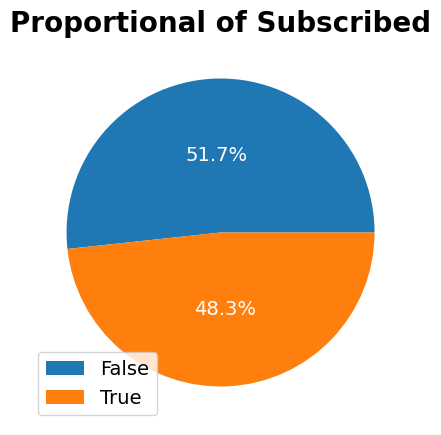

In [9]:
plt.pie(x=subscribed.values, labels=subscribed.index, autopct='%1.1f%%', pctdistance=0.5,
        textprops={'fontsize':14, 'color':'white'})
plt.title('Proportional of Subscribed', fontweight='bold', fontsize=20)
plt.legend()
plt.show()

In [10]:
likes = Country_df.groupby('Country Code')[['Views', 'Video Likes Added', 'User Subscriptions Added']].sum().sort_values(by='Video Likes Added', ascending=False)
likes

,Views,Video Likes Added,User Subscriptions Added
Country Code,,,
IN,1155510,52814,31144
US,1354450,52097,27267
BR,114161,9084,3181
GB,239177,8567,4814
CA,222373,7765,4412
...,...,...,...
GW,10,0,0
GQ,22,0,0
TD,65,0,0


In [11]:
likes['Views'] = likes['Views']//20

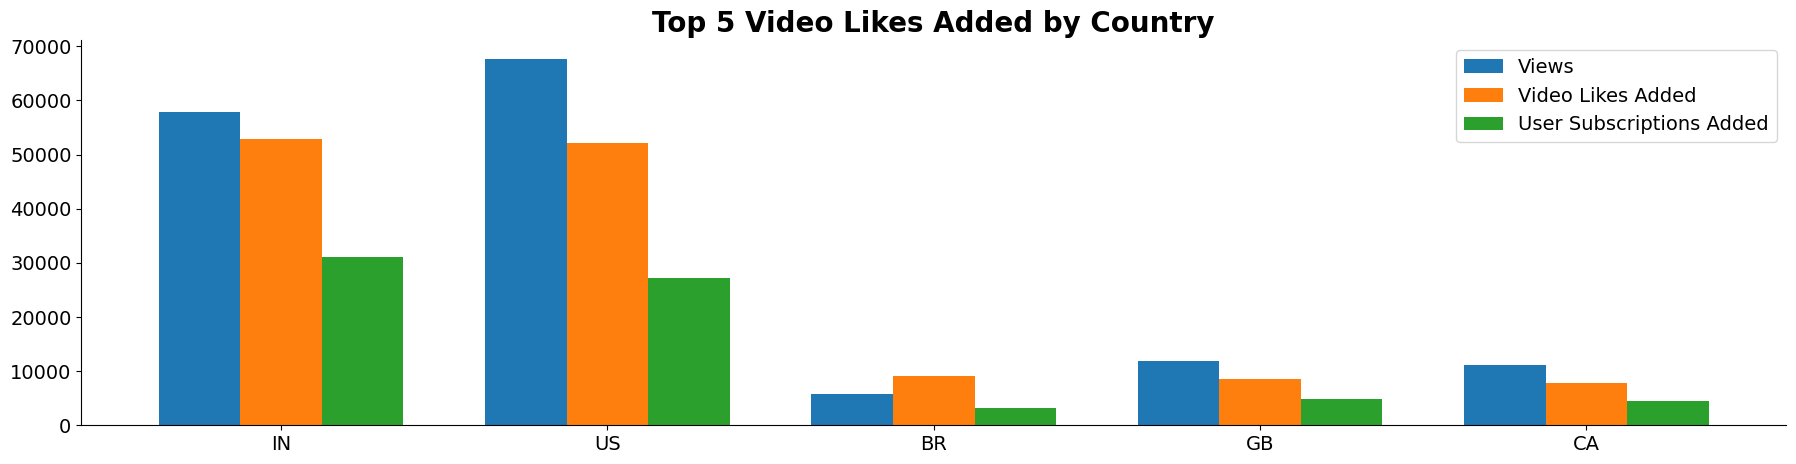

In [12]:
labels = likes.head().index
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
ax.bar(x-width, likes['Views'].head().values, width, label='Views')
ax.bar(x, likes['Video Likes Added'].head().values, width, label='Video Likes Added')
ax.bar(x+width, likes['User Subscriptions Added'].head().values, width, label='User Subscriptions Added')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Top 5 Video Likes Added by Country', fontweight='bold', fontsize=20)
plt.legend()
plt.show()

#### Notes:
1. What's about? - This data is about the performance of the videos in different countries.
2. What's inside? - 55,292 rows and 10 columns. `Country Code`, `Average View Percentage` and `Average Watch Time` contain null values.
3. The proportion of whether subscribed is almost the same, and unsubscribed users is slightly more than subscribed users.
4. India and US contribute the most views, likes and subscribtion.

### `Video_df` dataset

In [13]:
Video_df.head(3)

,Date,Video Title,External Video ID,Video Length,Thumbnail link,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
0,19 Jan 2022,Kaggle Project From Scratch - Part 2 (Explorat...,KQ80oD_boBM,2191,https://i.ytimg.com/vi/KQ80oD_boBM/hqdefault.jpg,13,0,0,0,0,0,0.07,151.30,0
1,19 Jan 2022,Welcome To My Channel | Ken Jee | Data Science,smeFkHwnM_k,51,https://i.ytimg.com/vi/smeFkHwnM_k/hqdefault.jpg,2,0,0,0,1,0,0.47,24.03,0
2,19 Jan 2022,How She Dominated the FAANG Data Science Inter...,vfV4nm004VQ,2686,https://i.ytimg.com/vi/vfV4nm004VQ/hqdefault.jpg,10,0,0,0,0,0,0.13,338.57,0


In [14]:
Video_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111857 entries, 0 to 111856
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Date                        111857 non-null  object 
 1   Video Title                 111857 non-null  object 
 2   External Video ID           111857 non-null  object 
 3   Video Length                111857 non-null  int64  
 4   Thumbnail link              111857 non-null  object 
 5   Views                       111857 non-null  int64  
 6   Video Likes Added           111857 non-null  int64  
 7   Video Dislikes Added        111857 non-null  int64  
 8   Video Likes Removed         111857 non-null  int64  
 9   User Subscriptions Added    111857 non-null  int64  
 10  User Subscriptions Removed  111857 non-null  int64  
 11  Average View Percentage     110510 non-null  float64
 12  Average Watch Time          110510 non-null  float64
 13  User Comments 

In [15]:
Video_df.describe()

,Video Length,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
count,"111,857.00","111,857.00","111,857.00","111,857.00","111,857.00","111,857.00","111,857.00","110,510.00","110,510.00","111,857.00"
mean,874.62,49.71,2.10,0.05,0.09,1.17,0.03,0.35,216.77,0.00
std,861.30,316.56,14.26,1.85,1.79,12.11,0.31,0.23,190.71,0.00
min,47.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,375.00,3.00,0.00,0.00,0.00,0.00,0.00,0.18,117.38,0.00
50%,548.00,9.00,0.00,0.00,0.00,0.00,0.00,0.34,181.50,0.00
75%,917.00,28.00,1.00,0.00,0.00,0.00,0.00,0.48,268.13,0.00
max,"5,029.00","35,677.00","1,610.00",289.00,420.00,"1,844.00",32.00,8.48,"5,322.30",0.00


In [16]:
Video_df.columns

Index(['Date', 'Video Title', 'External Video ID', 'Video Length',
       'Thumbnail link', 'Views', 'Video Likes Added', 'Video Dislikes Added',
       'Video Likes Removed', 'User Subscriptions Added',
       'User Subscriptions Removed', 'Average View Percentage',
       'Average Watch Time', 'User Comments Added'],
      dtype='object')

In [17]:
Video_df.head()['Date']

0    19 Jan 2022
1    19 Jan 2022
2    19 Jan 2022
3    19 Jan 2022
4    19 Jan 2022
Name: Date, dtype: object

In [18]:
Video_df['date'] = Video_df['Date'].str.split(' ')

In [19]:
Video_df['day'] = Video_df['date'].str[0]
Video_df['month'] = Video_df['date'].str[1]
Video_df['year'] = Video_df['date'].str[2]

In [20]:
Video_df.drop(columns=['Date', 'date'], inplace=True)
Video_df.head(3)

,Video Title,External Video ID,Video Length,Thumbnail link,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added,day,month,year
0,Kaggle Project From Scratch - Part 2 (Explorat...,KQ80oD_boBM,2191,https://i.ytimg.com/vi/KQ80oD_boBM/hqdefault.jpg,13,0,0,0,0,0,0.07,151.30,0,19,Jan,2022
1,Welcome To My Channel | Ken Jee | Data Science,smeFkHwnM_k,51,https://i.ytimg.com/vi/smeFkHwnM_k/hqdefault.jpg,2,0,0,0,1,0,0.47,24.03,0,19,Jan,2022
2,How She Dominated the FAANG Data Science Inter...,vfV4nm004VQ,2686,https://i.ytimg.com/vi/vfV4nm004VQ/hqdefault.jpg,10,0,0,0,0,0,0.13,338.57,0,19,Jan,2022


In [21]:
Video_df['month'] = Video_df['month'].str.replace('Sept', 'Sep')

In [22]:
Video_df['month'] = pd.to_datetime(Video_df['month'], format='%b').dt.month

In [23]:
video_by_year = Video_df.groupby('year')[['Views','Video Likes Added','User Subscriptions Added']].sum()
video_by_year

,Views,Video Likes Added,User Subscriptions Added
year,,,
2017,169,3,1
2018,6621,89,42
2019,50529,2002,1116
2020,2793552,129034,77663
2021,2536905,95701,48064
2022,173115,7571,3895


In [24]:
month_df = Video_df.groupby('month')[['Views','Video Likes Added','User Subscriptions Added', 'Average Watch Time']].sum().sort_index()
month_df

,Views,Video Likes Added,User Subscriptions Added,Average Watch Time
month,,,,
1,437400,17737,9732,"2,129,870.89"
2,246114,8935,4280,"1,444,359.16"
3,233707,8940,4410,"1,579,528.37"
4,339913,12500,6583,"1,649,289.05"
5,830344,37073,26913,"1,835,781.19"
6,664533,28448,16953,"1,826,149.28"
7,556580,25622,14774,"2,020,434.31"
8,519618,23394,11750,"2,141,553.36"
9,449235,19242,10030,"2,148,723.14"


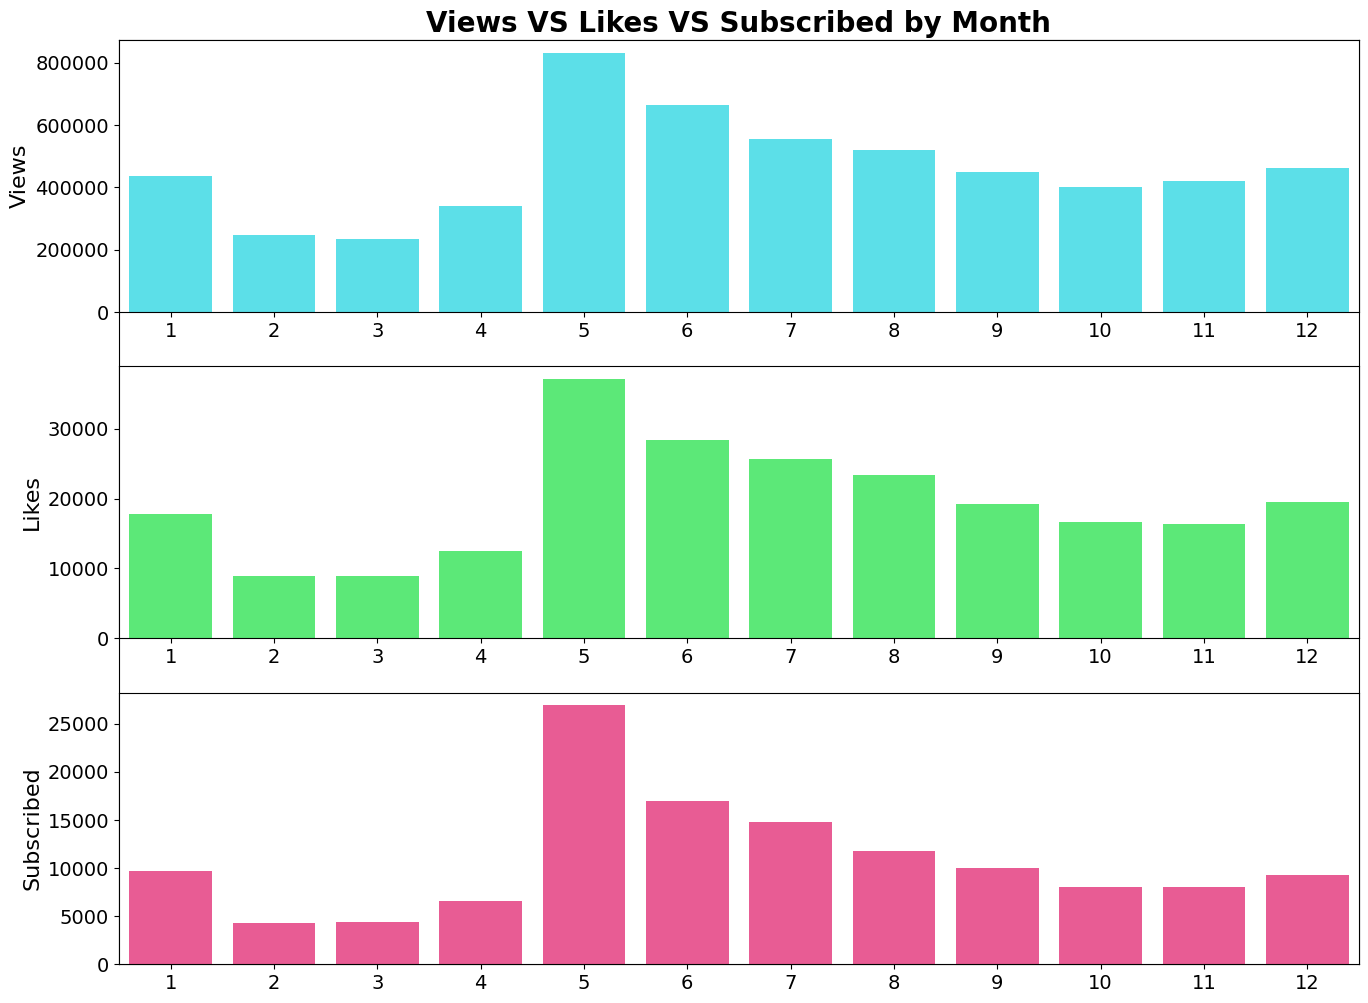

In [25]:
fig, ax = plt.subplots(figsize=(16,12))
ax.set_xticks([])
ax.set_yticks([])

plt.title('Views VS Likes VS Subscribed by Month', fontweight='bold', fontsize=20)

plt.subplot(3,1,1)
ax1 = sns.barplot(x='month',y='Views',data=month_df, color='#45f3ff')
ax1.set_xlabel('')
ax1.set_ylabel('Views', fontsize=16)

plt.subplot(3,1,2)
ax2 = sns.barplot(x='month',y='Video Likes Added',data=month_df, color="#45ff6a")
ax2.set_xlabel('')
ax2.set_ylabel('Likes', fontsize=16)

plt.subplot(3,1,3)
ax3 = sns.barplot(x='month',y='User Subscriptions Added',data=month_df, color="#ff458f")
ax3.set_xlabel('')
ax3.set_ylabel('Subscribed', fontsize=16)

plt.show()

#### Notes:
1. What's about? - This dataset is about the statistics of publishing YouTube videos by date.
2. What's inside? - 111,857 rows and 14 columns. `Average View Percentage` and `Average Watch Time` contain null values.
3. According to the `describe()` results, the average video length is around 875(s) and the average video views is around 50.
4. 2021 is the year with the most videos published as well as likes and subscriptions gained.
5. May is the month with the most videos published as well as likes and subscriptions gained. Maybe the most people choose May to startup their data science journey :)

### `Comment_df` dataset

In [26]:
Comment_df.head(3)

,Comments,Comment_ID,Reply_Count,Like_Count,Date,VidId,user_ID
0,Thanks for this video Ken.\n\nI decided to go ...,UgxFZTIzC4UPyhhX_PZ4AaABAg,0,0,2022-01-22T08:13:29Z,xpIFS6jZbe8,user_981
1,Hello ken jee!!! I'm doing a graduation on Com...,Ugx3IYuAufhb932GYQx4AaABAg,0,0,2022-01-22T01:09:46Z,xpIFS6jZbe8,user_213
2,"Thanks for this video, man. So useful. I'll me...",UgyhwwoK24arzRt1mud4AaABAg,0,0,2022-01-21T23:59:05Z,rEWPqw6rMGI,user_1065


In [27]:
Comment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Comments     10239 non-null  object
 1   Comment_ID   10240 non-null  object
 2   Reply_Count  10240 non-null  int64 
 3   Like_Count   10240 non-null  int64 
 4   Date         10240 non-null  object
 5   VidId        10240 non-null  object
 6   user_ID      10240 non-null  object
dtypes: int64(2), object(5)
memory usage: 560.1+ KB


In [28]:
Comment_df.describe()

,Reply_Count,Like_Count
count,"10,240.00","10,240.00"
mean,1.34,2.77
std,1.10,10.80
min,0.00,0.00
25%,1.00,1.00
50%,1.00,1.00
75%,2.00,2.00
max,21.00,501.00


In [29]:
Comment_df.columns

Index(['Comments', 'Comment_ID', 'Reply_Count', 'Like_Count', 'Date', 'VidId',
       'user_ID'],
      dtype='object')

#### Notes:
1. What's about: It's about the comments on the videos.
2. What's inside: 10,240 rows and 7 columns. There is a null value in `Comment` column.

### `Aggregate_df` dataset

In [30]:
Aggregate_df['Revenue'] = Aggregate_df['RPM (USD)'] * Aggregate_df['Views'] / 1000

In [31]:
Aggregate_df.head(3)

,Video,Video title,Video pub­lish time,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Av­er­age view dur­a­tion,Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%),Revenue
0,Total,NaN,NaN,14197,39640,3902,225021,45790,229241,5.28,11.99,26.61,0:03:25,5568487,"317,602.35",183451,"29,068.65",100954064,3.16,"29,379.34"
1,4OZip0cgOho,How I Would Learn Data Science (If I Had to St...,"May 8, 2020",907,9583,942,46903,451,46904,6.35,12.84,36.65,0:03:09,1253559,"65,850.70",46453,"7,959.53",26498799,3.14,"7,963.86"
2,78LjdAAw0wA,100K Channel Update + AMA Stream!,"Nov 12, 2020",412,4,4,130,15,12,2.67,6.26,6.26,0:05:14,2291,200.30,-3,6.11,188318,0.72,6.11


About RPM and CPM:

**RPM** is Revenue Per Mille (thousand views), which is a vital banchmark for YouTuber.

**CPM** is Cost Per Mille (thousand views), which is an important metric for ad-delivery to evaluate the cost efficiency of videos.

In [32]:
Aggregate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Video                                 224 non-null    object 
 1   Video title                           223 non-null    object 
 2   Video pub­lish time                   223 non-null    object 
 3   Com­ments ad­ded                      224 non-null    int64  
 4   Shares                                224 non-null    int64  
 5   Dis­likes                             224 non-null    int64  
 6   Likes                                 224 non-null    int64  
 7   Sub­scribers lost                     224 non-null    int64  
 8   Sub­scribers gained                   224 non-null    int64  
 9   RPM (USD)                             224 non-null    float64
 10  CPM (USD)                             222 non-null    float64
 11  Av­er­age per­cent­

In [33]:
Aggregate_df.describe()

,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%),Revenue
count,224.00,224.00,224.00,224.00,224.00,224.00,224.00,222.00,224.00,224.00,224.00,224.00,224.00,224.00,224.00,224.00
mean,126.75,353.92,34.84,"2,008.92",217.62,"1,608.08",4.44,11.44,34.09,"49,716.45","2,835.71","1,390.46",259.54,"901,357.25",3.08,261.60
std,948.73,"2,736.32",268.67,"15,387.27","3,058.77","15,628.83",1.79,3.33,15.12,"381,030.22","21,662.57","12,647.25","2,011.12","6,967,916.06",1.67,"2,031.11"
min,0.00,0.00,0.00,1.00,0.00,0.00,0.00,5.44,5.23,60.00,1.07,-21.00,0.00,365.00,0.49,0.00
25%,18.00,19.00,1.00,163.50,2.00,27.00,3.22,9.38,23.60,"3,940.00",177.04,19.75,12.21,"99,471.00",1.92,13.36
50%,37.00,46.50,4.00,342.50,7.00,70.00,4.33,11.17,35.12,"8,347.50",397.85,62.50,32.60,"154,192.50",2.90,32.78
75%,66.25,114.25,11.00,716.00,14.00,245.50,5.37,12.90,43.46,"18,368.75","1,145.62",230.50,96.81,"289,488.50",3.98,96.91
max,"14,197.00","39,640.00","3,902.00","225,021.00","45,790.00","229,241.00",10.39,37.79,76.60,"5,568,487.00","317,602.35","183,451.00","29,068.65","100,954,064.00",11.51,"29,379.34"


In [34]:
Aggregate_df.columns

Index(['Video', 'Video title', 'Video pub­lish time', 'Com­ments ad­ded',
       'Shares', 'Dis­likes', 'Likes', 'Sub­scribers lost',
       'Sub­scribers gained', 'RPM (USD)', 'CPM (USD)',
       'Av­er­age per­cent­age viewed (%)', 'Av­er­age view dur­a­tion',
       'Views', 'Watch time (hours)', 'Sub­scribers',
       'Your es­tim­ated rev­en­ue (USD)', 'Im­pres­sions',
       'Im­pres­sions click-through rate (%)', 'Revenue'],
      dtype='object')

#### Notes:
1. What's about: This dataset contains the aggregated information of each video. The first row is the aggregated result of all videos.
2. What's inside: 224 rows (including 1 row of aggregated results) and 19 columns. No null values.

---

### Question 1:
> *What are the themes of the comment data?*

To get the themes of comments data, it is a sentiment analysis.

To analyze the `Comment_df` dataframe, we categorize comments as positive, negative, or neutral using `polarity` scores. `Word clouds` are then generated to visualize key thematic words for each category.

In polarity score, +1 means positive, -1 means negative, and 0 means neutral.

Before using polarity to analyze the sentences, we should keep the sentence 'clear':

In [35]:
import re

def clean_text(text):
    # 1. 转为小写并去除首尾空白
    text = text.lower().strip()
    # 2. 移除指定的标点符号和特殊字符
    text = re.sub(r"([-?.!,/\"])", '', text)
    text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,']", "", text)
    # 3. 合并多个空格为单个空格
    text = re.sub(r"[ ]+", " ", text)
    # 4. 去除多余的换行符
    text = re.sub('\n\n','', text)
    # 5. 再次去除尾部空白
    text = text.rstrip().strip()
    return text

from textblob import TextBlob

clean_comments = []
for i in range(len(Comment_df['Comments'])):
    try:
        clean_comments.append(clean_text(Comment_df['Comments'][i]))
    except:
        clean_comments.append('None')
    # using indicator to show the processing of addressing
    if i % 1000==0:
        print(f'{i} iteration(s) completed')
Comment_df['Clean Comments'] = clean_comments

0 iteration(s) completed
1000 iteration(s) completed
2000 iteration(s) completed
3000 iteration(s) completed
4000 iteration(s) completed
5000 iteration(s) completed
6000 iteration(s) completed
7000 iteration(s) completed
8000 iteration(s) completed
9000 iteration(s) completed
10000 iteration(s) completed


Then, we can use polarity to analyze the sentences:

In [36]:
from textblob import TextBlob

polarity = []
for i in Comment_df['Clean Comments']:
    blob = TextBlob(i)
    polarity.append(round(blob.sentiment.polarity,3))
Comment_df['polarity'] = polarity
print('Polarity Column added to the dataframe')

Polarity Column added to the dataframe


In [37]:
Comment_df[['Comments', 'Clean Comments', 'polarity']].head(3)

,Comments,Clean Comments,polarity
0,Thanks for this video Ken.\n\nI decided to go ...,thanks for this video keni decided to go into ...,0.13
1,Hello ken jee!!! I'm doing a graduation on Com...,hello ken jee im doing a graduation on compute...,0.43
2,"Thanks for this video, man. So useful. I'll me...",thanks for this video man so useful ill meet y...,0.00


In [38]:
print(f"The positive comments are {Comment_df[Comment_df['polarity']>0].shape[0]}")
print(f"The negative comments are {Comment_df[Comment_df['polarity']<0].shape[0]}")
print(f"The neutral comments are {Comment_df[Comment_df['polarity']==0].shape[0]}")

The positive comments are 7117
The negative comments are 801
The neutral comments are 2322


In [39]:
Comment_df['sentiment'] = Comment_df['polarity'].apply(
    lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral')
)

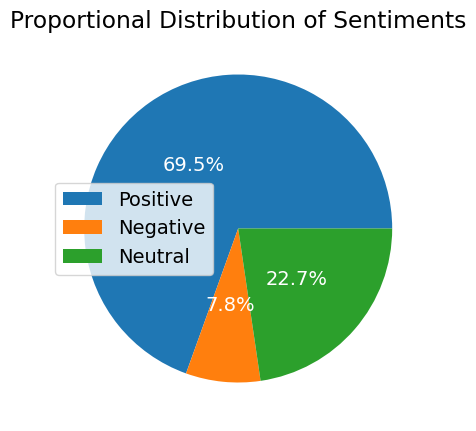

In [40]:
plt.pie(x=[len(Comment_df[Comment_df['sentiment'] == 'positive']), len(Comment_df[Comment_df['sentiment'] == 'negative']),
           len(Comment_df[Comment_df['sentiment'] == 'neutral'])], 
        labels=['Positive', 'Negative', 'Neutral'], autopct='%1.1f%%', pctdistance=0.5,
        textprops={'fontsize':14, 'color':'white'})
plt.title('Proportional Distribution of Sentiments')
plt.legend()
plt.show()

Divide the categroies into each dataframe

In [41]:
positive_comment = Comment_df[Comment_df['polarity']>0]
negative_comment = Comment_df[Comment_df['polarity']<0]
neutral_comment = Comment_df[Comment_df['polarity']==0]

Next, we can use `Word Cloud` to visulize the dominant themic words of each category.

To plot a word cloud, we should firstly clean the stop words (e.g., 'the', 'is', 'and', 'to' etc) and any other irrelevant or noisy words.

In [42]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

The word cloud of Positive comments:

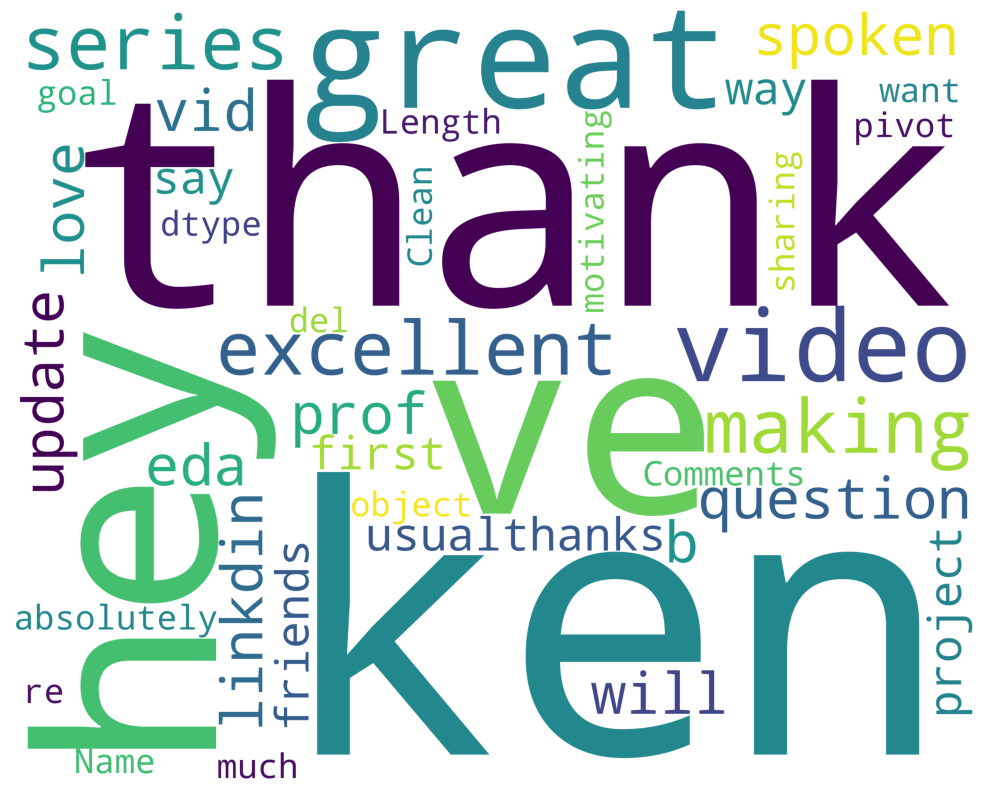

In [43]:
wordcloud = WordCloud(width=2500, height=2000, max_words=50,
                      background_color='White').generate(str(positive_comment['Clean Comments'].sample(1000, random_state=0)))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

To check the the comments more fairly, we can randomly choose 10 comments.

In [44]:
positive_sample = positive_comment['Clean Comments'].sample(10, random_state=0).to_list()
positive_sample

['thank you for making these excellent series very well structured',
 'hey ken i have a question i’ve spoken to you before back when i was getting started with the google data analytics certificate i’m done with the program now and i noticed they didn’t teach us how to create models and test sets and stuff … what would you suggest i do next i’m guessing machine learning is an important aspect of being a data analyst should i take a course on that and get that out of the way',
 'have you ever did eda on your own linkdin profile i came across this in linkdin feed where they do eda and make dashboard on your own linkdin data',
 'hey ken will love if you could update this video for 2022 i am petroleum engineer and in general i see the application of ml growing exponentially within the field not sure if you have anyone in your network that could advise on the transition i personally been doing mooc’s and undecided on doing the msc while working',
 'great video as usualthanks',
 'awesome stu

The general words of positive comments in conjunction with word cloud are:
- Gratitude to Ken's work
- LinkedIn profile

The word cloud of Nagetive comments:

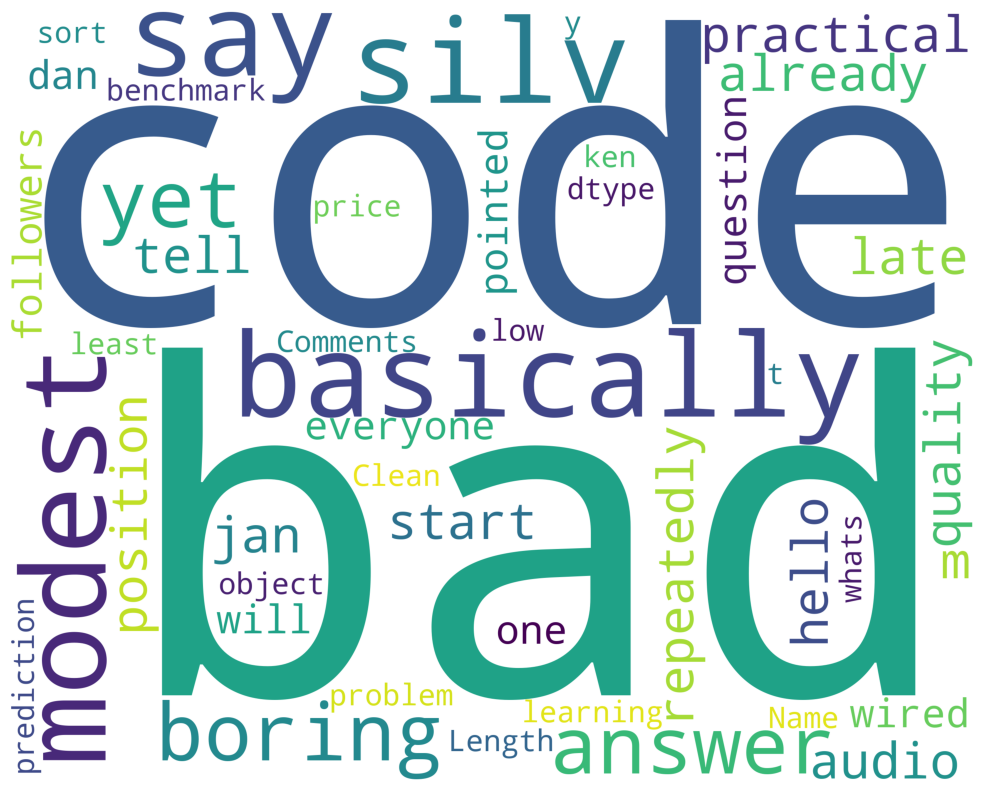

In [45]:
wordcloud = WordCloud(width=2500, height=2000, max_words=50,
                      background_color='White').generate(str(negative_comment['Clean Comments']))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [46]:
negative_sample = negative_comment['Clean Comments'].sample(10, random_state=0).to_list()
negative_sample

['i mean if kens offering it he should take it blindly i mean he gets ken as his coworker what else can anyone ask for 😳',
 'what a sad way to waste away an entire human life just to land a job its high time that the industry starts making well defined data science roles generally data scientists are supposed to know the entire lot of crap and apply only a miniscule % of that knowledge in real life i dont like the idea of living a life in this manner need to seriously rethink data science as a career living my life is more important for me they ask like 20 skillset for one position not worth it its not a creative process anymore',
 'hello i am trying to use the code to extract information from glassdoor but code is no more working may be due to changes in glassdoor can you suggest',
 'has some money saved and thought of getting this after the video but holy smokes its pretty expensive',
 'dude next time you do this please just stop going up and down the page it gave me nausea',
 'hello

The general words of negative comments in conjunction with word cloud are:
- the contents of the video is bad
- the coding is not good (basically)

The word cloud of Neutral comments:

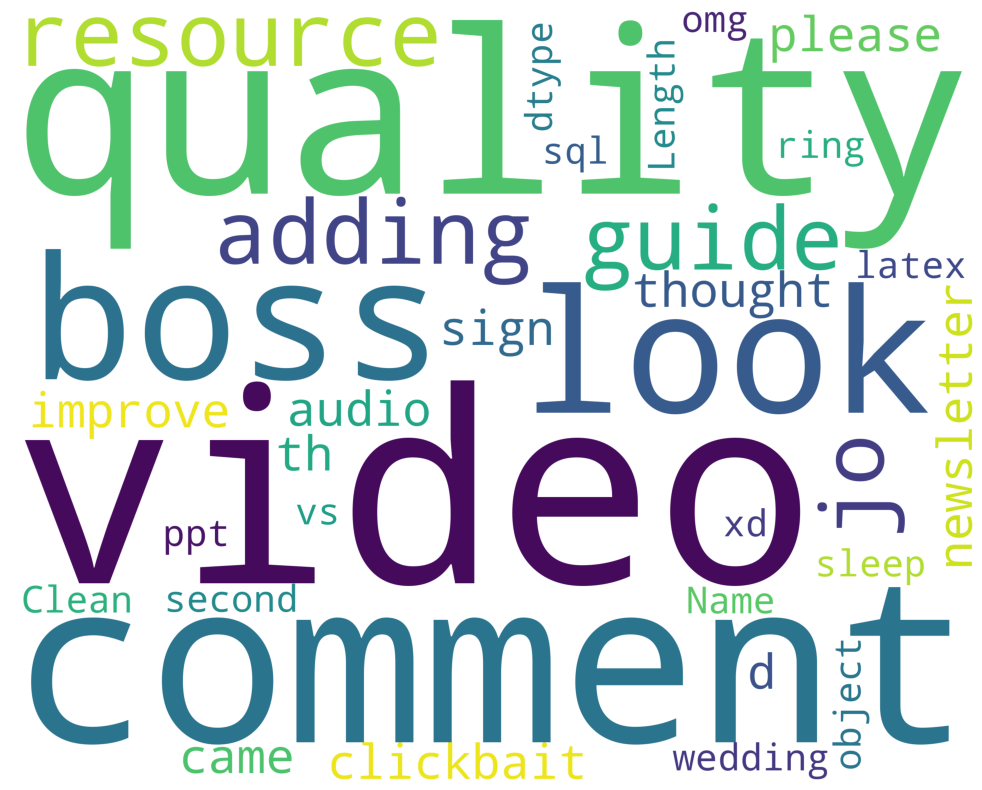

In [47]:
wordcloud = WordCloud(width=2500, height=2000, max_words=50,
                      background_color='White').generate(str(neutral_comment['Clean Comments'].sample(1000, random_state=0)))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [48]:
neutral_sample = neutral_comment['Clean Comments'].sample(10, random_state=0).to_list()
neutral_sample

['you look like a boss',
 'adding this video to my resource guide as i journey learning python to use for my needs',
 'clickbait',
 'please improve audio quality',
 'quality video once again sign me up for all the sports analytics content',
 'does the course contain end to end projects or its just on how to build your portfolio and how to behave in a data science interview and what should you expect',
 'hey every1 if yall faced an issue with the nltk downloading namely wordcloud error if u dont have the package use thisimport nltk\r\n\r\nnltkdownload',
 'hi ken this is so helpfulbut i do not get why does the constant appear on my corelation plot',
 'thank you sir for this video was keen to know about getting into sports analytics👍',
 'heres the link to the ai readiness article and model that i talk about in this video httpswwwinnoarchitechcomblogartificialintelligenceaimachinelearningreadiness']

The general words of neutral comments in conjunction with word cloud are:
- about the video quality
- clickbait(标题党)
- looks like judgments contents

**Conclusions:**
*"You can't please everyone."* 

The analysis of comments reveals three main themes:
1. Gratitude for Ken’s work, which is highly useful for job hunting, especially in developing personal projects.
2. Complaints about video quality, including graphics and content.
3. Neutral feedback on video relevance, varying by viewer preferences.

### Question 2:
> *What types of video titles and thumbnails drive the most traffic?*

To analyze the video titles which drive the most traffic, we should dive into `Impressions` and `Impressions click-through rate (%)`(CTR)

- When the impressions and CTR are high, it means the title or thumbnail are attractively.
- When the impressions high and CTR low, it means the title or thumbnail are not attractively.

In [49]:
Aggregate_df.head(3)

,Video,Video title,Video pub­lish time,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Av­er­age view dur­a­tion,Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%),Revenue
0,Total,NaN,NaN,14197,39640,3902,225021,45790,229241,5.28,11.99,26.61,0:03:25,5568487,"317,602.35",183451,"29,068.65",100954064,3.16,"29,379.34"
1,4OZip0cgOho,How I Would Learn Data Science (If I Had to St...,"May 8, 2020",907,9583,942,46903,451,46904,6.35,12.84,36.65,0:03:09,1253559,"65,850.70",46453,"7,959.53",26498799,3.14,"7,963.86"
2,78LjdAAw0wA,100K Channel Update + AMA Stream!,"Nov 12, 2020",412,4,4,130,15,12,2.67,6.26,6.26,0:05:14,2291,200.30,-3,6.11,188318,0.72,6.11


In [50]:
Aggregate_df.columns

Index(['Video', 'Video title', 'Video pub­lish time', 'Com­ments ad­ded',
       'Shares', 'Dis­likes', 'Likes', 'Sub­scribers lost',
       'Sub­scribers gained', 'RPM (USD)', 'CPM (USD)',
       'Av­er­age per­cent­age viewed (%)', 'Av­er­age view dur­a­tion',
       'Views', 'Watch time (hours)', 'Sub­scribers',
       'Your es­tim­ated rev­en­ue (USD)', 'Im­pres­sions',
       'Im­pres­sions click-through rate (%)', 'Revenue'],
      dtype='object')

In [51]:
attractive_df = Aggregate_df.loc[1:, ['Video title', 'Im­pres­sions', 'Im­pres­sions click-through rate (%)', 'Views', 'Av­er­age per­cent­age viewed (%)']].sort_values(by='Im­pres­sions', ascending=False)
attractive_df.head(3)

,Video title,Im­pres­sions,Im­pres­sions click-through rate (%),Views,Av­er­age per­cent­age viewed (%)
1,How I Would Learn Data Science (If I Had to St...,26498799,3.14,1253559,36.65
35,How I Learned Data Science,5447045,1.14,87169,25.84
7,The Best Free Data Science Courses Nobody is T...,4512254,3.24,297222,33.80


In [52]:
attractive_df[['Video title', 'Im­pres­sions']].sort_values(by='Im­pres­sions', ascending=False).head(10)

,Video title,Im­pres­sions
1,How I Would Learn Data Science (If I Had to St...,26498799
35,How I Learned Data Science,5447045
7,The Best Free Data Science Courses Nobody is T...,4512254
13,3 Proven Data Science Projects for Beginners (...,3137644
103,Reviewing Your Data Science Projects - Episode...,2941130
40,Different Data Science Roles Explained (by a D...,2927350
11,Data Science Certificate vs Bootcamp vs Master...,2247912
17,Beginner Kaggle Data Science Project Walk-Thro...,2040561
29,The Projects You Should Do To Get A Data Scien...,1748467
12,How I Would Learn Data Science in 2021 (What H...,1699309


In [53]:
attractive_df[['Video title', 'Im­pres­sions click-through rate (%)']].sort_values(by='Im­pres­sions click-through rate (%)',ascending=False).head(10)

,Video title,Im­pres­sions click-through rate (%)
223,ProjectDemoCSC478_UFCFightData,11.51
20,Why I Quit Data Science,8.62
75,Should You Get A Masters in Data Science?,8.40
21,Scrape Twitter Data in Python with Twitterscra...,7.71
105,Should You Learn R for Data Science?,7.45
56,The Best Computer for Data Science Beginners,7.16
113,What Does a Data Scientist Actually Do?,6.60
10,Data Science Project from Scratch - Part 2 (Da...,6.53
71,Data Science Project from Scratch - Part 7 (Do...,6.18
33,How YOU Can Land a Sports Analytics Job,6.12


From the results above, we can see that the top 10 videos of impressions and CTR are different from each other. So, what can we do now?

💡Define: How *good* is really good? -- setting threshold for each, like top 20%

In [54]:
# setting the threshold for impression and CTR
# .quantile(x) can get the value at x-th quantile of the dataset
# where x is a number between 0 and 1 representing a percentage.
impression_threshold = attractive_df['Im­pres­sions'].quantile(0.8)
CTR_threshold = attractive_df['Im­pres­sions click-through rate (%)'].quantile(0.8)

result = attractive_df[(attractive_df['Im­pres­sions'] >= impression_threshold) & (attractive_df['Im­pres­sions click-through rate (%)'] >= CTR_threshold)]
result.head(10)


,Video title,Im­pres­sions,Im­pres­sions click-through rate (%),Views,Av­er­age per­cent­age viewed (%)
17,Beginner Kaggle Data Science Project Walk-Thro...,2040561,4.71,168183,15.89
29,The Projects You Should Do To Get A Data Scien...,1748467,4.36,131630,25.41
34,3 Reasons You Should NOT Become a Data Scientist,1316053,5.41,93329,46.02
15,Why You Probably Won't Become a Data Scientist,1302907,5.04,108133,41.36
93,How to Set Up Your Data Science Environment (A...,996148,4.49,75351,35.83
41,Data Science Project from Scratch - Part 1 (Pr...,778177,5.35,102854,30.37
20,Why I Quit Data Science,659163,8.62,98777,40.99
10,Data Science Project from Scratch - Part 2 (Da...,640357,6.53,71147,24.28
28,Data Science Project from Scratch - Part 3 (Da...,629607,4.82,50234,16.98
33,How YOU Can Land a Sports Analytics Job,561044,6.12,50498,37.90


Now, we get to know that these 10 video titles draw more attention! Solved!

BONUS: Draw a Funnel Chart for the top 1 video in `result`.

In [55]:
temp = Aggregate_df[Aggregate_df['Video title']==result.iloc[0,0]]

In [56]:
temp

,Video,Video title,Video pub­lish time,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Av­er­age view dur­a­tion,Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%),Revenue
17,I3FBJdiExcg,Beginner Kaggle Data Science Project Walk-Thro...,"Jul 17, 2020",174,1265,59,4321,40,2585,5.33,13.70,15.89,0:06:04,168183,"17,039.66",2545,894.75,2040561,4.71,896.42


In [57]:
import plotly.graph_objects as go 

stages = ['Impression', 'View', 'Like', 'Subscribe','Share']
values = [temp.iloc[0,17], temp.iloc[0,13], temp.iloc[0,6], temp.iloc[0,8], temp.iloc[0,4]]

fig = go.Figure(go.Funnel(
    y=stages,  
    x=values,
    textinfo="value+percent initial",
    texttemplate='%{value}<br>%{percentInitial:.2%}'
))

fig.update_layout(
    title="Funnel Chart of the Top 1 Video", 
    yaxis_title="Stages",  
    xaxis_title="Values"   
)

fig.show()

How about the whole videos?

In [58]:
Aggregate_df.columns

Index(['Video', 'Video title', 'Video pub­lish time', 'Com­ments ad­ded',
       'Shares', 'Dis­likes', 'Likes', 'Sub­scribers lost',
       'Sub­scribers gained', 'RPM (USD)', 'CPM (USD)',
       'Av­er­age per­cent­age viewed (%)', 'Av­er­age view dur­a­tion',
       'Views', 'Watch time (hours)', 'Sub­scribers',
       'Your es­tim­ated rev­en­ue (USD)', 'Im­pres­sions',
       'Im­pres­sions click-through rate (%)', 'Revenue'],
      dtype='object')

In [59]:
Aggregate_df.loc[0,['Im­pres­sions', 'Views', 'Likes', 'Sub­scribers gained', 'Shares']]

Im­pres­sions          100954064
Views                    5568487
Likes                     225021
Sub­scribers gained       229241
Shares                     39640
Name: 0, dtype: object

In [60]:
import plotly.graph_objects as go 

stages = ['Impression', 'View', 'Like', 'Subscribe','Share']
values = [Aggregate_df.iloc[0,17], Aggregate_df.iloc[0,13], Aggregate_df.iloc[0,6], Aggregate_df.iloc[0,8], Aggregate_df.iloc[0,4]]

fig = go.Figure(go.Funnel(
    y=stages,  
    x=values,
    textinfo="value+percent initial",
    texttemplate='%{value}<br>%{percentInitial:.2%}'
))

fig.update_layout(
    title="Funnel Chart of the Whole Video", 
    yaxis_title="Stages",  
    xaxis_title="Values"   
)

fig.show()

In [61]:
# setting the threshold for impression and CTR
# .quantile(x) can get the value at x-th quantile of the dataset
# where x is a number between 0 and 1 representing a percentage.
impression_threshold = attractive_df['Im­pres­sions'].quantile(0.8)
CTR_threshold = attractive_df['Im­pres­sions click-through rate (%)'].quantile(0.8)


🧐Why that's matter?

Funnel chart can directly show the conversion rate of each stage. From the chart, we get to know where is the ideal target. For instance, from the *Funnel Chart of the Whole Video*, if we want to achieve 100 new **subscribers**, we should make our video:
- **likes** to 98
- **views** to 2,450
- **impressions** to 44,545

### Question 3:
> *Who is my core audience and what are they interested in?*

This question is about the most popular video in different locations. So we should study the `Country_df` dataframe.

In [62]:
Country_df.head(3)

,Video Title,External Video ID,Video Length,Thumbnail link,Country Code,Is Subscribed,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
0,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,HK,True,23,1,0,0,2,0,0.67,39.64,0
1,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,ME,True,3,0,0,0,0,0,0.50,29.43,0
2,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,RW,True,2,0,0,0,0,0,0.68,40.23,0


In [63]:
Country_df.columns

Index(['Video Title', 'External Video ID', 'Video Length', 'Thumbnail link',
       'Country Code', 'Is Subscribed', 'Views', 'Video Likes Added',
       'Video Dislikes Added', 'Video Likes Removed',
       'User Subscriptions Added', 'User Subscriptions Removed',
       'Average View Percentage', 'Average Watch Time', 'User Comments Added'],
      dtype='object')

In [64]:
top_audiences = Country_df.groupby('Country Code')[['Views', 'Average Watch Time']].sum().sort_values(by='Views', ascending=False)
top_audiences

,Views,Average Watch Time
Country Code,,
US,1354450,"104,244.41"
IN,1155510,"68,148.15"
GB,239177,"104,764.95"
CA,222373,"100,712.35"
DE,172165,"99,523.10"
...,...,...
ER,2,545.31
NU,1,27.90
BL,1,1.10


In [65]:
pd.set_option('display.float_format', '{:,.2f}'.format)

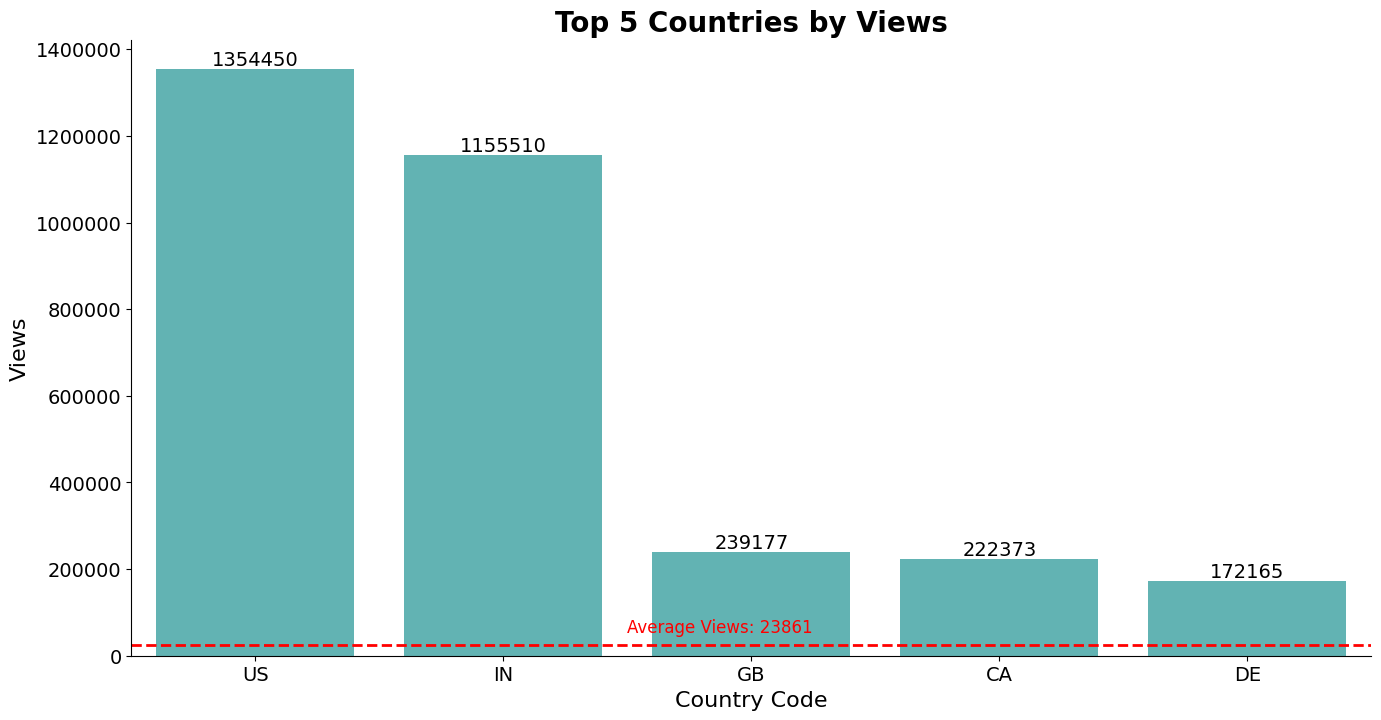

In [66]:
plt.figure(figsize=(16,8))
colors = ["#E72C2C", "#61C154", "#5456C1", "#54C1C1", "#ECF161"]
ax = sns.barplot(x=top_audiences.head().index, y=top_audiences['Views'].head().values, color="#54C1C1")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ticklabel_format(style='plain', axis='y')
ax.bar_label(ax.containers[0], fmt='%.0f')
ax.set_title('Top 5 Countries by Views', fontweight='bold', fontsize=20)
ax.set_xlabel('Country Code', fontsize=16)
ax.set_ylabel('Views', fontsize=16)

plt.axhline(top_audiences['Views'].mean(),
            linestyle='--',
            lw=2, zorder=1,
            color='red')

plt.annotate(f"Average Views: {round(top_audiences['Views'].mean())}", 
             (1.5, top_audiences['Views'].mean()+30000),
             fontsize=12,
             color='red')

plt.show()

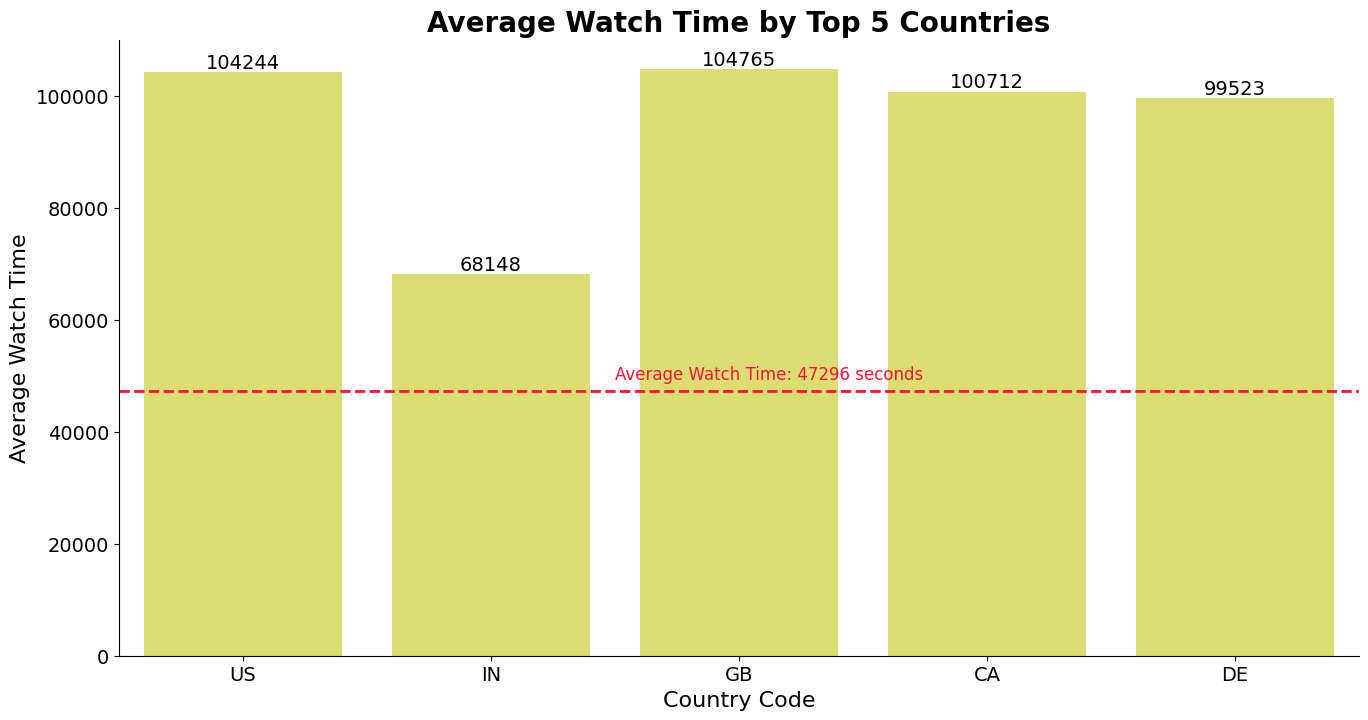

In [67]:
plt.figure(figsize=(16,8))
colors = ["#E72C2C", "#61C154", "#5456C1", "#54C1C1", "#ECF161"]
ax = sns.barplot(x=top_audiences.head().index, y=top_audiences['Average Watch Time'].head().values, color="#ECF161")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ticklabel_format(style='plain', axis='y')
ax.bar_label(ax.containers[0], fmt='%.0f')
ax.set_title('Average Watch Time by Top 5 Countries', fontweight='bold', fontsize=20)
ax.set_xlabel('Country Code', fontsize=16)
ax.set_ylabel('Average Watch Time', fontsize=16)

plt.axhline(top_audiences['Average Watch Time'].mean(),
            linestyle='--',
            lw=2, zorder=1,
            color='#ff1234')

plt.annotate(f"Average Watch Time: {round(top_audiences['Average Watch Time'].mean())} seconds", 
             (1.5, top_audiences['Average Watch Time'].mean()+2000),
             fontsize=12,
             color='#ff1234')

plt.show()

**Conclusions:**
- Using a simple filter, we identified US, India, Great Britain, Canada and Germany as the top 5 countries by channel viewership.
- Regarding average watch time, the United States, United Kingdom, Canada, and Germany have similar durations, approximately 100,000 seconds per video, while India’s is notably different. The average watch time for all five countries exceeds the dataset’s overall average.

### Question 4:
> *What types of videos have lead to the most growth?*

In [68]:
Aggregate_df.columns

Index(['Video', 'Video title', 'Video pub­lish time', 'Com­ments ad­ded',
       'Shares', 'Dis­likes', 'Likes', 'Sub­scribers lost',
       'Sub­scribers gained', 'RPM (USD)', 'CPM (USD)',
       'Av­er­age per­cent­age viewed (%)', 'Av­er­age view dur­a­tion',
       'Views', 'Watch time (hours)', 'Sub­scribers',
       'Your es­tim­ated rev­en­ue (USD)', 'Im­pres­sions',
       'Im­pres­sions click-through rate (%)', 'Revenue'],
      dtype='object')

In [69]:
growth_df = Aggregate_df[['Video title','Video pub­lish time','Sub­scribers gained']].sort_values(by='Sub­scribers gained', ascending=False).drop([0]).head(5)
growth_df

,Video title,Video pub­lish time,Sub­scribers gained
1,How I Would Learn Data Science (If I Had to St...,"May 8, 2020",46904
7,The Best Free Data Science Courses Nobody is T...,"Mar 9, 2020",10734
13,3 Proven Data Science Projects for Beginners (...,"Feb 17, 2020",9508
12,How I Would Learn Data Science in 2021 (What H...,"Dec 19, 2020",3358
41,Data Science Project from Scratch - Part 1 (Pr...,"Apr 3, 2020",3184


In [70]:
growth_df['Video title'].to_list()

['How I Would Learn Data Science (If I Had to Start Over)',
 'The Best Free Data Science Courses Nobody is Talking About',
 '3 Proven Data Science Projects for Beginners (Kaggle)',
 'How I Would Learn Data Science in 2021 (What Has Changed?)',
 'Data Science Project from Scratch - Part 1 (Project Planning)']

**Conclusions:**
The top 5 videos that gained the most subscribers are above. 

The themes are about:
- How to start a data science project
- How to learn data science (espercially for free)

### Question 5:
> *What type of content are people engaging with the most or watching the longest?*

In [71]:
Aggregate_df.head(3)

,Video,Video title,Video pub­lish time,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Av­er­age view dur­a­tion,Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%),Revenue
0,Total,NaN,NaN,14197,39640,3902,225021,45790,229241,5.28,11.99,26.61,0:03:25,5568487,"317,602.35",183451,"29,068.65",100954064,3.16,"29,379.34"
1,4OZip0cgOho,How I Would Learn Data Science (If I Had to St...,"May 8, 2020",907,9583,942,46903,451,46904,6.35,12.84,36.65,0:03:09,1253559,"65,850.70",46453,"7,959.53",26498799,3.14,"7,963.86"
2,78LjdAAw0wA,100K Channel Update + AMA Stream!,"Nov 12, 2020",412,4,4,130,15,12,2.67,6.26,6.26,0:05:14,2291,200.30,-3,6.11,188318,0.72,6.11


In [72]:
longest_wathc_df = Aggregate_df[['Video title', 'Watch time (hours)']].sort_values(by='Watch time (hours)',ascending=False).drop([0])
longest_wathc_df.head()

,Video title,Watch time (hours)
1,How I Would Learn Data Science (If I Had to St...,"65,850.70"
17,Beginner Kaggle Data Science Project Walk-Thro...,"17,039.66"
13,3 Proven Data Science Projects for Beginners (...,"10,560.36"
7,The Best Free Data Science Courses Nobody is T...,"10,465.05"
11,Data Science Certificate vs Bootcamp vs Master...,"9,057.28"


In [73]:
longest_wathc_df['Video title'].head().to_list()

['How I Would Learn Data Science (If I Had to Start Over)',
 'Beginner Kaggle Data Science Project Walk-Through (Titanic)',
 '3 Proven Data Science Projects for Beginners (Kaggle)',
 'The Best Free Data Science Courses Nobody is Talking About',
 'Data Science Certificate vs Bootcamp vs Masters Degree']

**Conclusion 1:**

The top 5 longest watched videos are above, they are about:
- How to learn data science (especially for free)
- How to start a data science project
- How to make a proven data science project

In [74]:
engaged_df = Aggregate_df[['Video title','Com­ments ad­ded']].sort_values(by='Com­ments ad­ded',ascending=False).drop([0])
engaged_df.head()

,Video title,Com­ments ad­ded
1,How I Would Learn Data Science (If I Had to St...,907
2,100K Channel Update + AMA Stream!,412
3,Uber Driver to Machine Learning Engineer in 9 ...,402
4,Why I'm Starting Data Science Over Again.,375
5,Interview with the Director of AI Research @ N...,329


In [75]:
engaged_df['Video title'].head().to_list()

['How I Would Learn Data Science (If I Had to Start Over)',
 '100K Channel Update + AMA Stream!',
 'Uber Driver to Machine Learning Engineer in 9 Months! (@Daniel Bourke) - KNN EP. 05',
 "Why I'm Starting Data Science Over Again.",
 'Interview with the Director of AI Research @ NVIDIA (Anima Anandkumar) - KNN EP. 07']

**Conclusion 2:**

The top 5 engaged videos are above, they are about:
- How to learn data science
- Real-life related: job shifting and interviewing

## Additional Questions:

### Question 1:
> *What are the most common words or phrases used in the video titles and thumbnails?*

This issue is also about sentiment analysis. 

In [76]:
titles = Aggregate_df['Video title'].drop([0]).reset_index()
titles.drop(columns='index', inplace=True)
titles

,Video title
0,How I Would Learn Data Science (If I Had to St...
1,100K Channel Update + AMA Stream!
2,Uber Driver to Machine Learning Engineer in 9 ...
3,Why I'm Starting Data Science Over Again.
4,Interview with the Director of AI Research @ N...
...,...
218,Demystifying Data Science Roles
219,Most Data Science Hopefuls Overlook This Impor...
220,IT'S NOT TOO LATE TO LEARN CODE!
221,NASA Physicist Turned Data Scientist (Tim Bowl...


In [77]:
clean_titles = []
for i in range(len(titles['Video title'])):
    try:
        clean_titles.append(clean_text(titles['Video title'][i]))
    except:
        clean_titles.append('None')
titles['clean title'] = clean_titles

In [78]:
titles.head()

,Video title,clean title
0,How I Would Learn Data Science (If I Had to St...,how i would learn data science if i had to sta...
1,100K Channel Update + AMA Stream!,100k channel update ama stream
2,Uber Driver to Machine Learning Engineer in 9 ...,uber driver to machine learning engineer in 9 ...
3,Why I'm Starting Data Science Over Again.,why im starting data science over again
4,Interview with the Director of AI Research @ N...,interview with the director of ai research nvi...


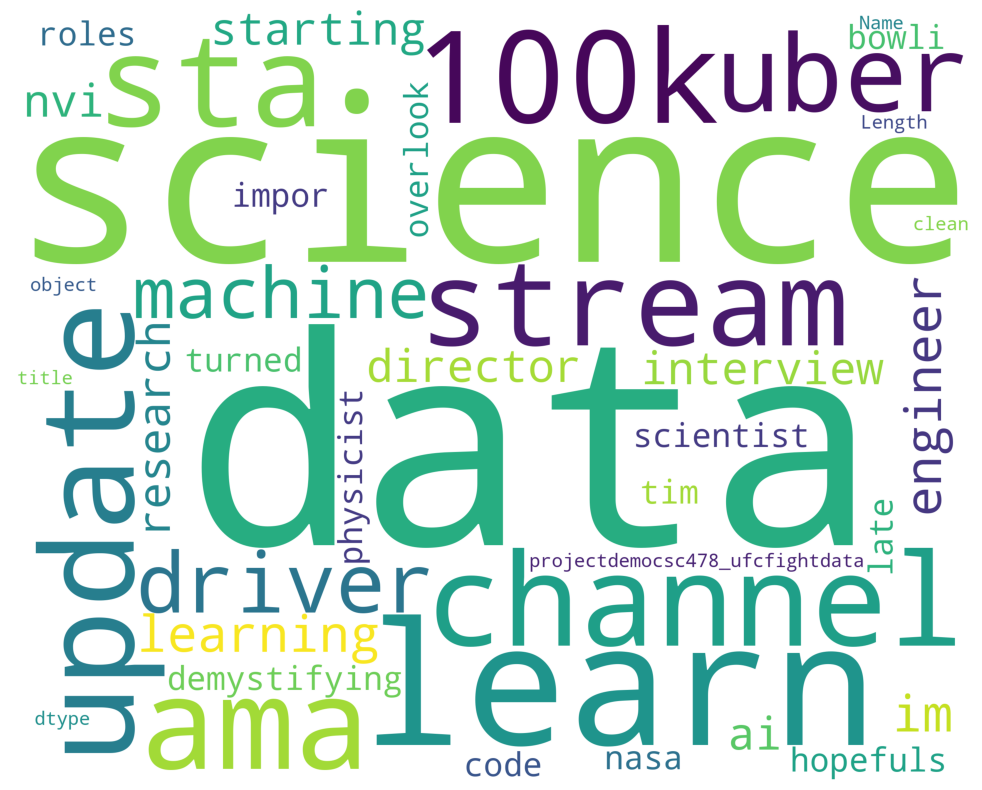

In [79]:
wordcloud = WordCloud(width=2500, height=2000, max_words=50,
                      background_color='White').generate(str(titles['clean title']))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [80]:
from collections import Counter
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stopwords_en = set(stopwords.words('english'))

text = ' '.join(titles['clean title'].astype(str))

# 简单分词（按空格和标点分割）
words = re.findall(r'\w+', text.lower())

# 过滤停用词
filtered_words = [word for word in words if word not in stopwords_en]

# 统计词频
word_freq = Counter(filtered_words)

# 查看词频最高的前10个词
hotest_words = word_freq.most_common(10)
hotest_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/songzhao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('data', 190),
 ('science', 145),
 ('projects', 29),
 ('episode', 23),
 ('project', 22),
 ('reviewing', 21),
 ('knn', 16),
 ('ep', 16),
 ('scientist', 14),
 ('3', 13)]

In [81]:
hotest_words = pd.DataFrame(hotest_words, columns=['word', 'freq'])

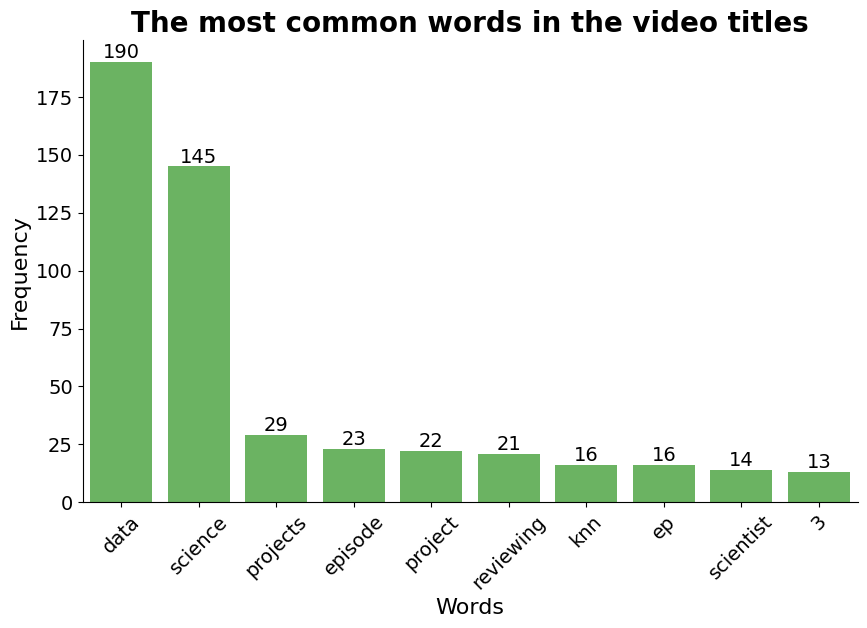

In [82]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=hotest_words['word'],
            y=hotest_words['freq'],
            color="#61C154")
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('The most common words in the video titles',
          fontweight='bold', fontsize=20)
plt.xlabel('Words', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()

**Conclusions:**

The most frequent words in video titles are "data," "science," and "project," confirming our predictions.

### Question 2:
> *How does the video duration affect the number of views and subscribers?*

In [83]:
Aggregate_df.columns

Index(['Video', 'Video title', 'Video pub­lish time', 'Com­ments ad­ded',
       'Shares', 'Dis­likes', 'Likes', 'Sub­scribers lost',
       'Sub­scribers gained', 'RPM (USD)', 'CPM (USD)',
       'Av­er­age per­cent­age viewed (%)', 'Av­er­age view dur­a­tion',
       'Views', 'Watch time (hours)', 'Sub­scribers',
       'Your es­tim­ated rev­en­ue (USD)', 'Im­pres­sions',
       'Im­pres­sions click-through rate (%)', 'Revenue'],
      dtype='object')

In [84]:
duration_df = Aggregate_df[['Av­er­age view dur­a­tion', 'Views', 'Sub­scribers lost', 'Sub­scribers gained', 'Sub­scribers']]
duration_df.head()

,Av­er­age view dur­a­tion,Views,Sub­scribers lost,Sub­scribers gained,Sub­scribers
0,0:03:25,5568487,45790,229241,183451
1,0:03:09,1253559,451,46904,46453
2,0:05:14,2291,15,12,-3
3,0:10:21,21350,9,198,189
4,0:02:36,49564,40,1957,1917


In [85]:
duration_df['Av­er­age view dur­a­tion'] = pd.to_datetime(duration_df['Av­er­age view dur­a­tion'])
duration_df.head()

,Av­er­age view dur­a­tion,Views,Sub­scribers lost,Sub­scribers gained,Sub­scribers
0,2025-07-30 00:03:25,5568487,45790,229241,183451
1,2025-07-30 00:03:09,1253559,451,46904,46453
2,2025-07-30 00:05:14,2291,15,12,-3
3,2025-07-30 00:10:21,21350,9,198,189
4,2025-07-30 00:02:36,49564,40,1957,1917


In [86]:
duration_df['Average view duration seconds'] = duration_df['Av­er­age view dur­a­tion'].dt.second+duration_df['Av­er­age view dur­a­tion'].dt.minute*60+duration_df['Av­er­age view dur­a­tion'].dt.hour*3600
duration_df.drop('Av­er­age view dur­a­tion', axis=1, inplace=True)
duration_df.head()

,Views,Sub­scribers lost,Sub­scribers gained,Sub­scribers,Average view duration seconds
0,5568487,45790,229241,183451,205
1,1253559,451,46904,46453,189
2,2291,15,12,-3,314
3,21350,9,198,189,621
4,49564,40,1957,1917,156


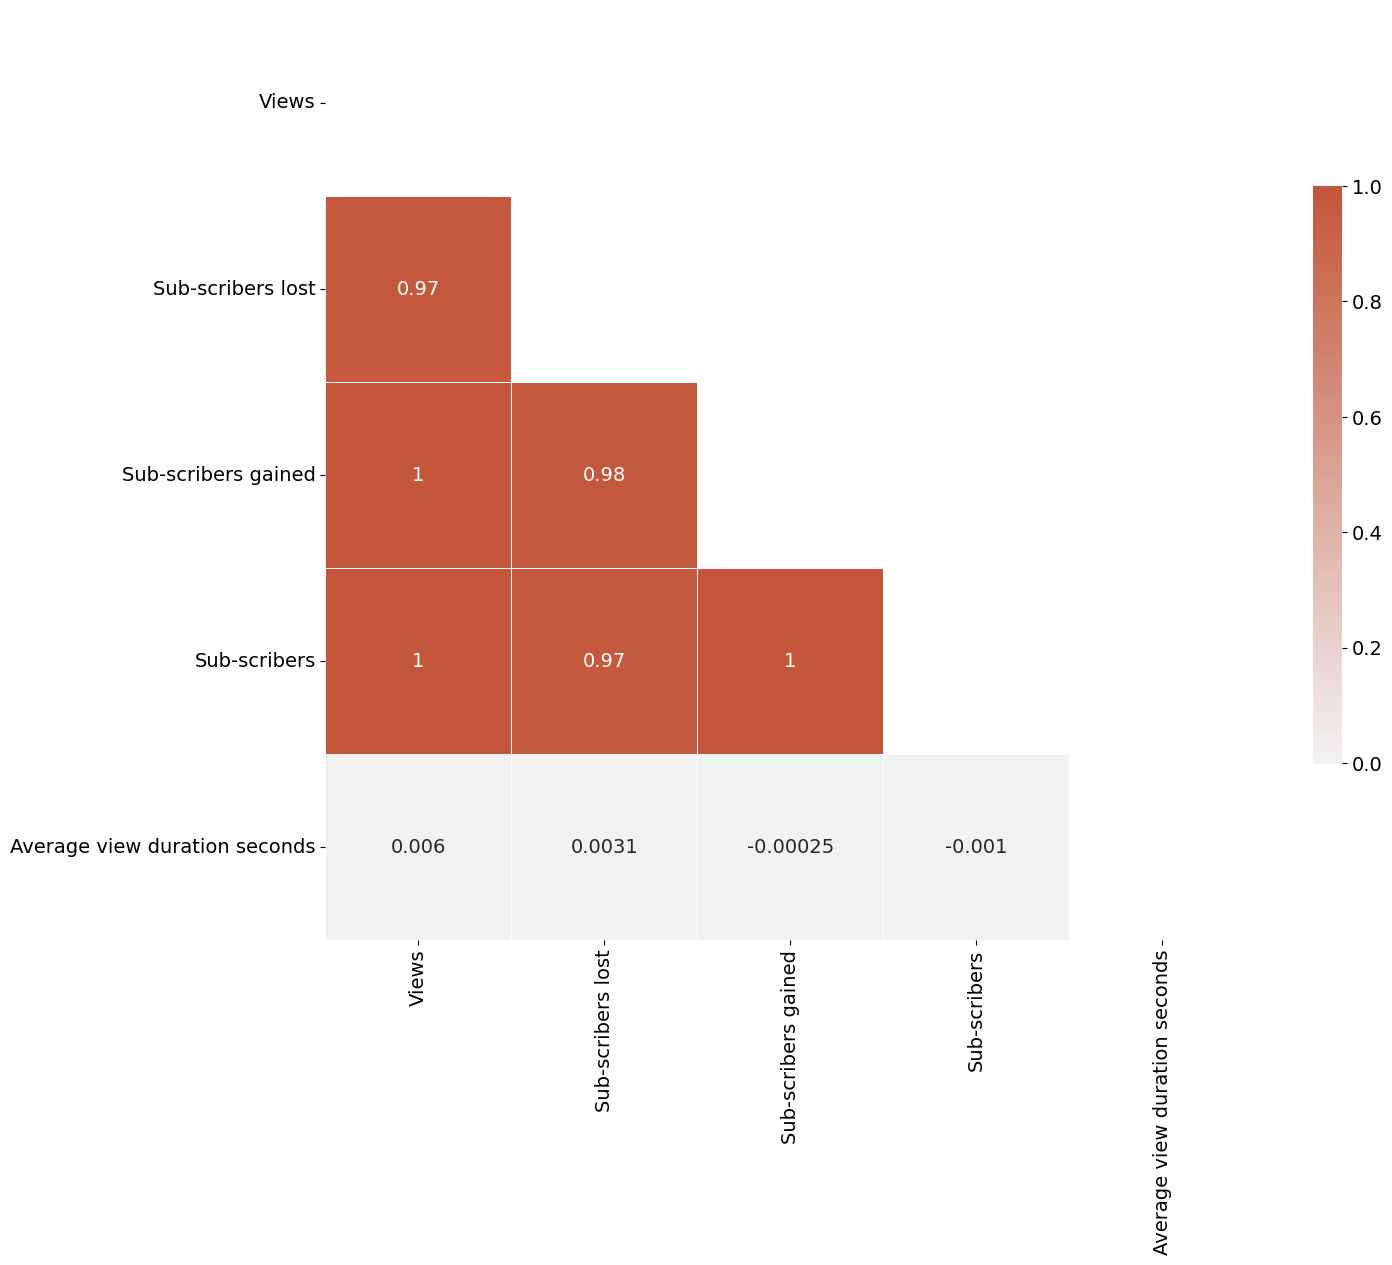

In [87]:
corr = duration_df[['Views', 'Sub­scribers lost', 'Sub­scribers gained', 'Sub­scribers',
       'Average view duration seconds']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15,15))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True,square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()

The Pearson correlation coefficients show weak relationships between average view duration and both views and subscribers. However, a slightly negative correlation between subscriber growth and view duration aligns with expectations. Likewise, the longer view duration, the less subscriber lost.

In [88]:
duration_df.columns

Index(['Views', 'Sub­scribers lost', 'Sub­scribers gained', 'Sub­scribers',
       'Average view duration seconds'],
      dtype='object')

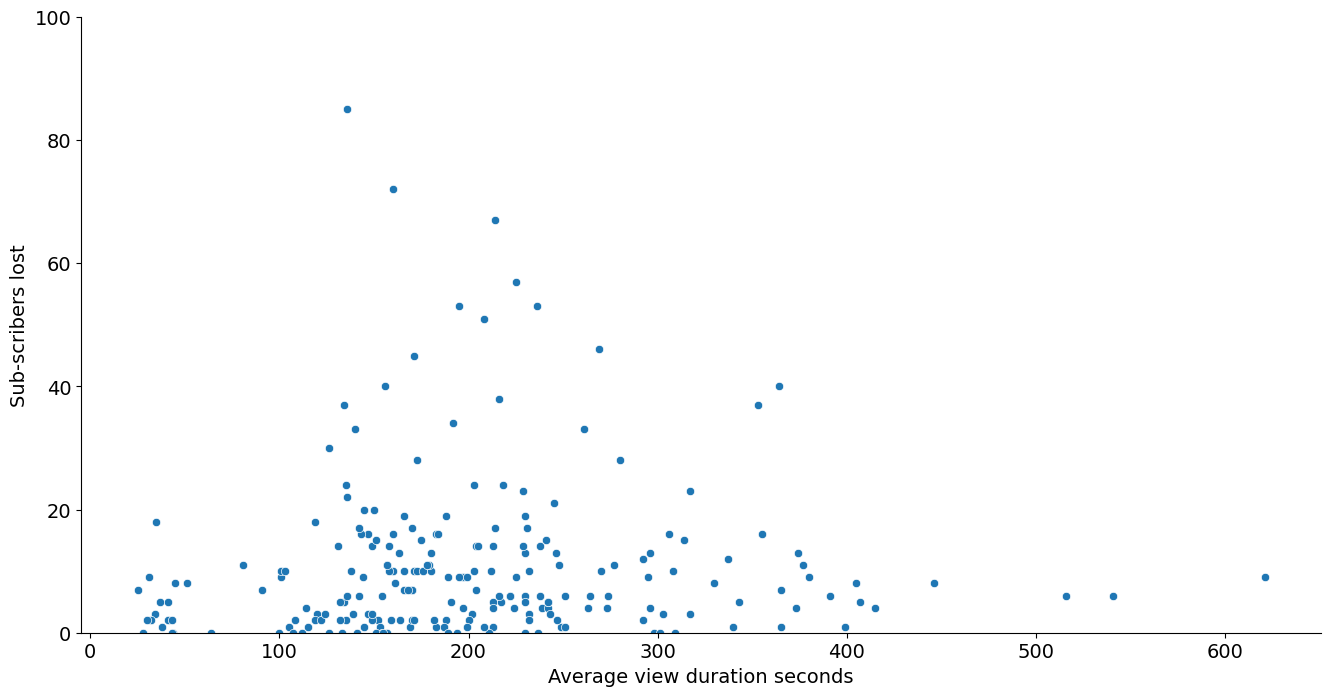

In [89]:
plt.figure(figsize=(16,8))
ax = sns.scatterplot(x='Average view duration seconds', 
                y='Sub­scribers lost', data=duration_df)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim(0, 100)
# sns.regplot(x='Average view duration seconds', y='Sub­scribers lost', data=duration_df, scatter=True, line_kws={'color': 'r'})
plt.show()

### Question 3:
> *What is the relationship between the video duration and the number of comments?*

In [90]:
Video_df.columns

Index(['Video Title', 'External Video ID', 'Video Length', 'Thumbnail link',
       'Views', 'Video Likes Added', 'Video Dislikes Added',
       'Video Likes Removed', 'User Subscriptions Added',
       'User Subscriptions Removed', 'Average View Percentage',
       'Average Watch Time', 'User Comments Added', 'day', 'month', 'year'],
      dtype='object')

In [91]:
Aggregate_df.columns

Index(['Video', 'Video title', 'Video pub­lish time', 'Com­ments ad­ded',
       'Shares', 'Dis­likes', 'Likes', 'Sub­scribers lost',
       'Sub­scribers gained', 'RPM (USD)', 'CPM (USD)',
       'Av­er­age per­cent­age viewed (%)', 'Av­er­age view dur­a­tion',
       'Views', 'Watch time (hours)', 'Sub­scribers',
       'Your es­tim­ated rev­en­ue (USD)', 'Im­pres­sions',
       'Im­pres­sions click-through rate (%)', 'Revenue'],
      dtype='object')

In [92]:
ext_video_df = Video_df[['Video Title', 'External Video ID', 'Video Length']]
ext_agg_df = Aggregate_df[['Video', 'Com­ments ad­ded']]

In [93]:
video_length_comment = pd.merge(ext_video_df, ext_agg_df, left_on='External Video ID', right_on='Video', how='left')
video_length_comment

,Video Title,External Video ID,Video Length,Video,Com­ments ad­ded
0,Kaggle Project From Scratch - Part 2 (Explorat...,KQ80oD_boBM,2191,KQ80oD_boBM,59.00
1,Welcome To My Channel | Ken Jee | Data Science,smeFkHwnM_k,51,smeFkHwnM_k,4.00
2,How She Dominated the FAANG Data Science Inter...,vfV4nm004VQ,2686,vfV4nm004VQ,38.00
3,The 9 Books That Changed My Perspective in 2019,3TrAYmrmA8o,980,3TrAYmrmA8o,13.00
4,Interview with the Director of AI Research @ N...,Xgg7dIKys9E,2904,Xgg7dIKys9E,329.00
...,...,...,...,...,...
111852,Predicting Crypto-Currency Price Using RNN lST...,qfRhKHV8-t4,311,qfRhKHV8-t4,28.00
111853,Predicting Crypto-Currency Price Using RNN lST...,qfRhKHV8-t4,311,qfRhKHV8-t4,28.00
111854,Predicting Crypto-Currency Price Using RNN lST...,qfRhKHV8-t4,311,qfRhKHV8-t4,28.00
111855,Predicting Crypto-Currency Price Using RNN lST...,qfRhKHV8-t4,311,qfRhKHV8-t4,28.00


In [94]:
len_com_df = video_length_comment.groupby(['Video Title', 'Video Length'])['Com­ments ad­ded'].sum().reset_index()

In [95]:
len_com_df

,Video Title,Video Length,Com­ments ad­ded
0,#66DaysOfData - 3 Reasons to Start!,53,"3,392.00"
1,#66DaysOfData - What is it? #shorts,47,"5,824.00"
2,#66DaysOfData Round 3 Live Event! (feat. @Stat...,3735,384.00
3,10000 Subscriber and 100th Video Special (Data...,172,"7,598.00"
4,100K Channel Update + AMA Stream!,5029,"61,388.00"
...,...,...,...
218,Why are APIs Important for Data Science?,322,"7,252.00"
219,Why is Balance Important in Data Science?,238,"2,094.00"
220,Work From Home Data Scientist: Day in the Life,331,"46,690.00"
221,git for Data Science Made Simple... (Hopefully),392,"21,792.00"


In [96]:
pearson_len_com = len_com_df['Video Length'].corr(len_com_df['Com­ments ad­ded'])
pearson_len_com

0.17118969216806465

In [97]:
print(f"The Pearson correlation coefficient\nbetween video length and comments added is {round(pearson_len_com, 4)}")

The Pearson correlation coefficient
between video length and comments added is 0.1712
